In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [2]:
from Cluster import *

Getting data:
getting JHU data...
number of countries listed 274
done with JHU data.  Got  274 countries.
getting owid data...
data for population changes only slowly if at all in OWID database
done with owid data. Got 212 countries
WHO acute file found dictionary acute_who
ICU file found dictionary icus_2012
---------------------------------
Done with data.
---------------------------------
Getting deaths, case and testing data...
done.
doing piecwise linear fits to testing data ...
done.
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default
----------------------------------------
Finished loading Cluster module
----------------------------------------


In [3]:
cases = [c for c in clusdata_all]
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [4]:
datasets = ['deaths','cases','cases_lin2020','cases_pwlfit','cases_nonlin']

d_countries = [c for c in clusdata_all['deaths']]
c_countries = [c for c in clusdata_all['cases']]
lc_countries = [c for c in clusdata_all['cases_lin2020']]
pc_countries = [c for c in clusdata_all['cases_pwlfit']]
nc_countries = [c for c in clusdata_all['cases_nonlin']]

countries = d_countries

In [5]:
# check that all country sets being used are the same and check time series lengths and starting dates
countrysets = [d_countries,c_countries,lc_countries,pc_countries,nc_countries]
print([len(ccs) for ccs in countrysets])
for ccs1 in countrysets:
    print([ccs1 == ccs2 for ccs2 in countrysets])
print([len(clusdata_all[d1]['United States']) for d1 in datasets])
print(len(total_deaths_x['dates']),len(total_cases_x['dates']),len(testing_x['dates']),total_deaths_x['dates'][0],total_cases_x['dates'][0],testing_x['dates'][0])

[68, 68, 68, 68, 68]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[154, 154, 154, 154, 154]
270 270 270 12/31/19 12/31/19 12/31/19


In [6]:
# 61 countries on Sep 24 with mindeaths=200 and mindays=160
# note that changing the minimal common active epidemic time series length mindays from 160 to 150 included only 4 new countries on Sep 24
# decreasing minimal total death count from 200 to 100 included only 3 new countries on Sep 24 
# doing both included 7 new countries : 68 in total 
len(testing_x['dates'])

270

# ClusterFit testing

In [7]:
np.argsort(list(range(4,14)))[-1:][0]

9

16000 2 seats

In [8]:

base = '../../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_jhu = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths_jhu = get_data(base+'time_series_covid19_deaths_global.csv')

In [9]:
[x for x in dir() if 'death' in x]

['deaths',
 'deaths_jhu',
 'deaths_owid',
 'deaths_raw',
 'mindeaths',
 'new_deaths_spm',
 'new_deaths_spm_x',
 'short_deaths',
 'short_deaths_c',
 'short_deaths_est',
 'total_deaths',
 'total_deaths_x']

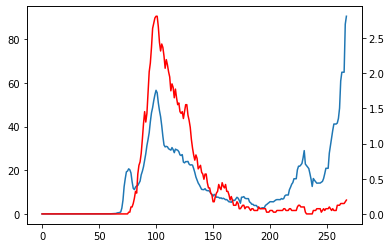

In [10]:
fig,ax = plt.subplots()
ax.plot(new_cases_spm['Denmark'])
axx = ax.twinx()
axx.plot(new_deaths_spm['Denmark'],color='red');


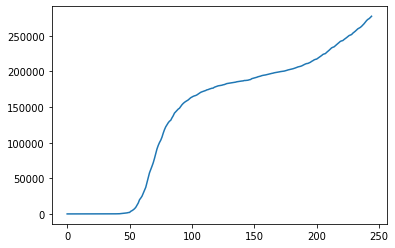

In [11]:

plt.plot(confirmed_jhu[('Germany','')])

## cases

In [ ]:
len(clusdata_all['cases'])

In [ ]:
#foo = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foo.umap_cluster(5,5,n_neighbors=6)
print('mean cluster membership probability =',np.mean(foo.clus_probs))
foo.plot_umap()

In [ ]:
foo.clus_labels
print(len(foo.clus_labels))
print(len(c_countries))

In [ ]:
foo.clus_labels

In [ ]:
labelled = [(foo.clus_labels[i],c_countries[i]) for i in range(len(foo.clus_labels))]
print(labelled)

In [ ]:
np.lexsort((c_countries,foo.clus_labels))

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=4,n_neighbors=6)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.clus_labels

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## cases FFT

In [ ]:
len(clusdata_all['cases'])

In [ ]:
foofft = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
np.mean(foofft.clus_probs)

In [ ]:
foofft.clus_labels

In [ ]:
foofft.cluster_plot_all()

In [ ]:
foofft.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## deaths

In [ ]:
len(clusdata_all['deaths'])

In [ ]:
foo = ClusterFit(clusdata_all['deaths']) # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['deaths'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['deaths'],fft=None) 

In [ ]:
foo.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foo.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=3)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## deaths FFT

In [ ]:
foofft = ClusterFit(clusdata_all['deaths'],fft='fft')

In [ ]:
foofft.umap_cluster(3) # arg = random seed

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.plot_pcas()

In [ ]:
clusfit_all['deaths'] = foofft

# Plots of all countries

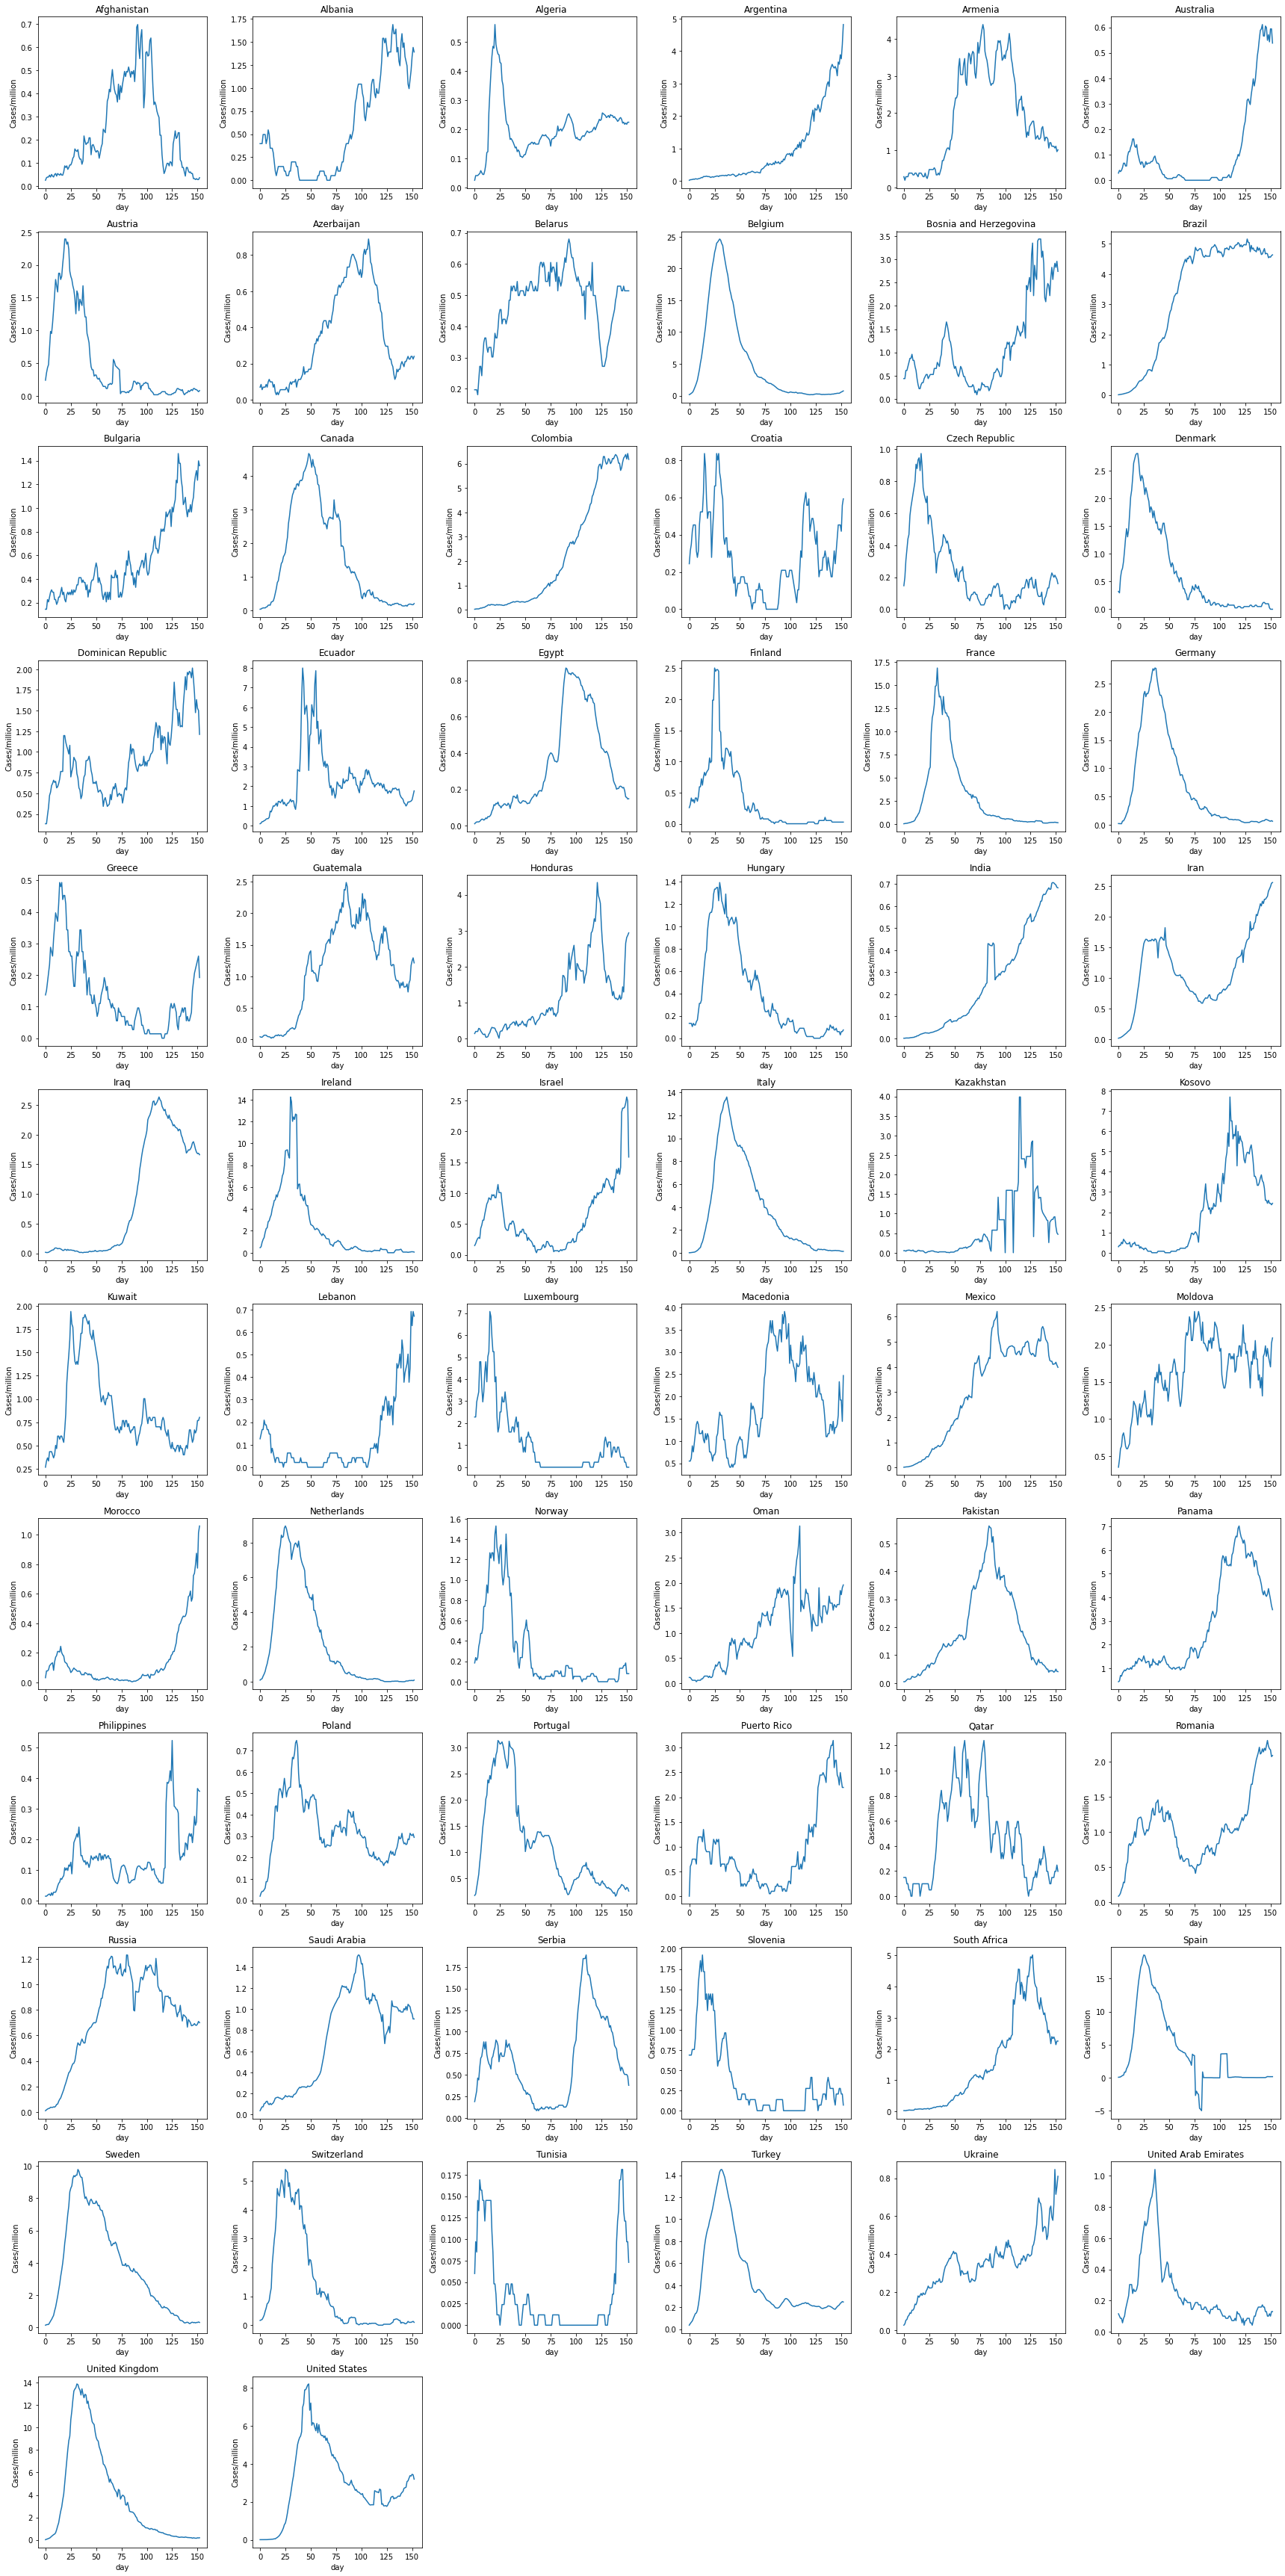

In [9]:
plot_all(countries,clusdata_all['deaths'])

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlin'],longshort_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr'],longshort_reg_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_pwlfit'],longshort_reg_testing_c)

In [ ]:
plot_all(lcountries,cases_raw,cases_adj_lin2020)

# Compare best clusters

In [ ]:
datasets = [c for c in clusdata_all]
datasets

In [ ]:
len(countries)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr']);

In [ ]:
#  Norman not sure I understand what you are printing out with "found 48 clusters of size 3" , seems wrong
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    mfit.umap_best_cluster()
    res[d] = mfit

In [ ]:
for rr in res:
    foo = res[rr]
    # foo.plot_umap() ########## doesn't work???
    plt.scatter(foo.um_dat[0],foo.um_dat[1],c=foo.clus_labels)
    plt.title(rr)
    plt.show()

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn

def match1(a,x):
    rtn = [1 for i in range(len(a)) if a[i] == x]
    return rtn
    
def imxcor(clusters,nset,n,nclus,nclusmax=6): 
    """ finds cluster index in previous datasets d best correlated to cluster n in dataset dd
        nclus is current number of already aligned clusters
        nclusmax is max allowed number of clusters
    """
    cx = []
    cc = clusters[nset]
    for j in range(0,nset):
        c = mapclusters[j]
        klen = min(nclusmax,len(cc))
        for k in range(nclus): # find best matching previous cluster
            cx.append(np.sum(match1(cc,n)*match1(c,k)))
    return argmax(cx),max(cx)

In [ ]:
maxclusters = 6
clusters = [res[d].clus_labels for d in res]
ncountries = len(res['deaths'])
mapclusters = np.zeros((len(clusters),ncountries)
mapclusters[0,:] = clusters[0,:] # class lables are those of deaths to start, may be expanded
corclasses = np.zeros((len(classes),len(classes)))
c = clusters[0] # the first dataset clusters are all accepted as first clusters
nclusters = len(set(c))                    
for j in range(1,len(clusters)):
    cc = clusters[j] # clus_labels for jth dataset
                      # map clusters to best matching cluster in 0th dataset : losers try with other previous datasets : losers new
    for k in set(cc):
                       i,cor = imxcor(k,cc,nclusmax=nclasses)
                       
    corclasses[i,j] = mxcor(c,cc)
    corclasses[j,i] = corclasses[i,j]
for i in range(len(classes)):
    corclasses[i,i] = 1.0
plt.imshow(corclasses)    

In [ ]:
print([(i,c,np.mean(corclasses[i,:])) for i,c in enumerate([r for r in res])])

In [ ]:
for i in range(6):
    plt.plot(list(range(6)),corclasses[i,:])

Note: `cases_nonlin` and `cases_nonlinr` currently same.

**Cluster correlations not outstandingly high!**

In [ ]:
foo = res['cases_nonlin']

In [ ]:
def plot_adj(country, data, adj = None, testing=None,  ndays=250, axis = None):
    ndays = 250
    if testing:
        # Ntests = regtests(testing,country)  # this does not work here, since data is already synchronized, use regularized data in testing 
        Ntests = testing[country]
    if axis is None:   
        fig, ax1 = plt.subplots(figsize=(12,8))
    else:
        ax1 = axis
    ax1.plot(data[country][:ndays]) 
    if adj is not None:  # already adjusted
        ax1.plot(adj[country][:ndays])
    ax1.set_title(country)
    ax1.set_ylabel('Cases/million')
    ax1.set_xlabel('day')
    if testing:
        ax2 = ax1.twinx()
        ax2.plot(Ntests[:ndays],color='red',alpha=0.4)
        ax2.set_ylabel('Testing/1000')

        
def plot_all(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        plot_adj(country,dat,adj,testing,ndays,axis=axes[row,col])
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plt.plot(foo.smoothed[0])

In [ ]:
len(foo.dat[0,:])

In [ ]:
dat1 = {countries[i]:foo.dat[i,:] for i in range(len(countries))}
dat2 = {countries[i]:foo.smoothed[i,:] for i in range(len(countries))}
plot_all(countries,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus0 = [i for i,x in enumerate(res[cc].clus_labels) if x==0]

count0 = [countries[i] for i in clus0]
plot_all(count0,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==1]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==2]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

# Hdbscan on raw data

In [7]:
foo = list(range(10))
foo[3]='red'
foo

[0, 1, 2, 'red', 4, 5, 6, 7, 8, 9]

In [8]:
foodeath = ClusterFit(clusdata_all['deaths'])


In [9]:
foodeath.hdbscan()

cluster validity index = 0.2587163439641958
cluster validity of each cluster:
cluster 0 validity = 0.2587163439641958
cluster 0 validity = [0.26173946 0.30259596]


In [10]:
foodeath.umap(n_neighbors=4)

In [11]:
len(foodeath.clus_labels)

68

In [12]:
foodeath.clus_labels

array([ 0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0,  0,  0,  1,  0, -1,  1,
        1,  0, -1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  0, -1,  1,  0,  1,  1,  1, -1,  1,  0,  1,  1,  1])

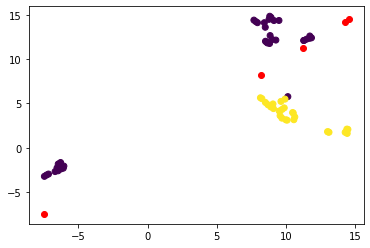

In [13]:
foodeath.plot_umap()

# hdbscan on raw PCA

In [14]:
foodeath = ClusterFit(clusdata_all['deaths'])

In [15]:
foodeath.hdbscan_pca()

shape of cluster data =  (68, 10)
cluster validity index = 0.3217733667662741
cluster validity of each cluster:
cluster 1 validity = 0.3217733667662741
cluster 1 validity = [0.41287235 0.3252435 ]


In [16]:
foodeath.umap(n_neighbors=4)

In [17]:
len(foodeath.clus_labels)

68

In [18]:
foodeath.clus_labels

array([ 1,  1,  0,  1,  1,  1,  0,  1, -1,  0,  1, -1,  1,  0,  1, -1,  0,
        0,  1, -1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,
        1,  1,  0,  1,  0,  1,  1, -1,  1,  0,  0,  1,  1,  1,  1,  0,  0,
        1, -1,  1,  1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  1,  0,  0,  0])

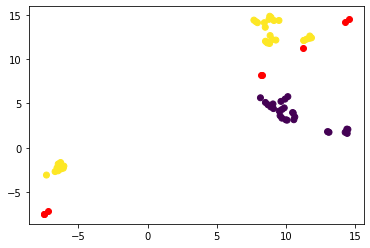

In [19]:
foodeath.plot_umap()

# FPCA

[Example](https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py) of FPCA...

Also: see same example in the fpca_example notebook.

Also:  see [documentation](https://fda.readthedocs.io/en/latest/modules/preprocessing/dim_reduction/autosummary/skfda.preprocessing.dim_reduction.projection.FPCA.html?highlight=fpca) for FPCA.

## Using raw data (as discrete samples)

### Preliminary scratch...

In [20]:
dat = foodeath.dat

In [21]:
foodeath.fitted.shape

(68, 10)

In [22]:
dat.shape

(68, 154)

In [23]:
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial



In [24]:
len(dat[0])

154

Configure data a samples of a function on a grid, specify the grid as list of days:

In [25]:
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [26]:
len(dat_disc)

68

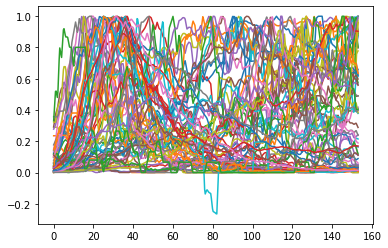

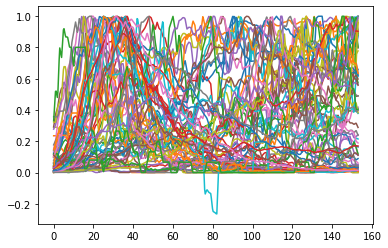

In [27]:
dat_disc.plot()

Text(0.5, 1.0, 'Spain')

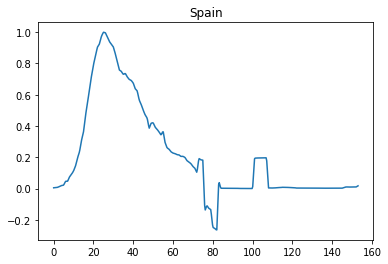

In [28]:
idx = [i for i,x in enumerate(countries) if x=="Spain"][0]
dat_disc[idx].plot()
plt.title(countries[idx])

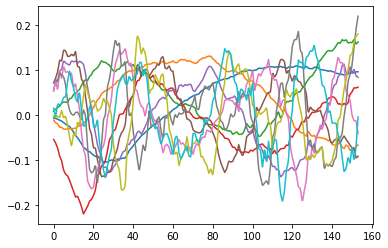

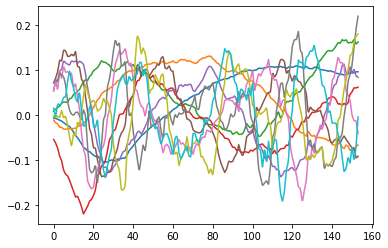

In [29]:
fpca_disc = FPCA(n_components=10)
fpca_disc.fit(dat_disc)
fpca_disc.components_.plot()


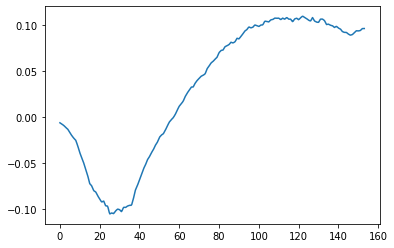

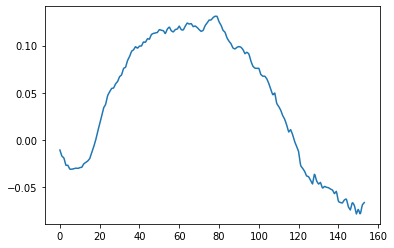

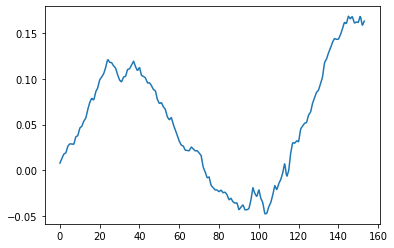

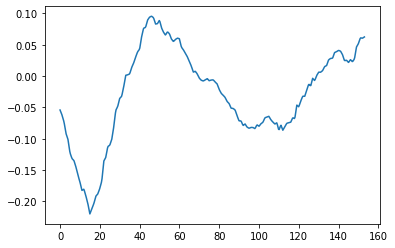

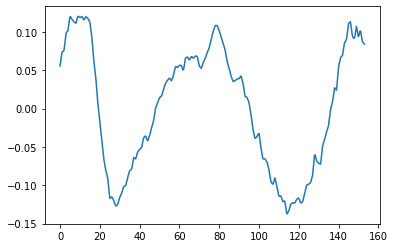

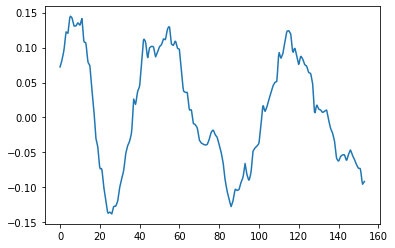

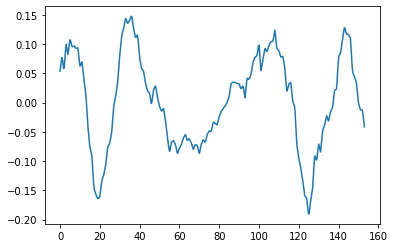

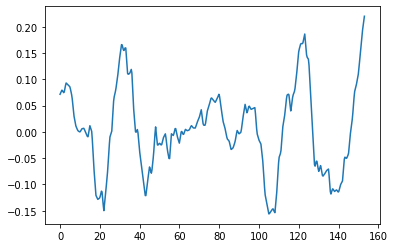

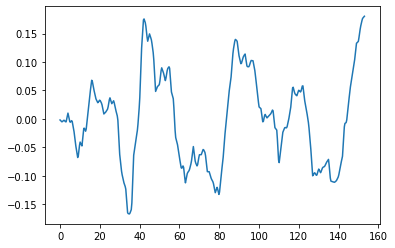

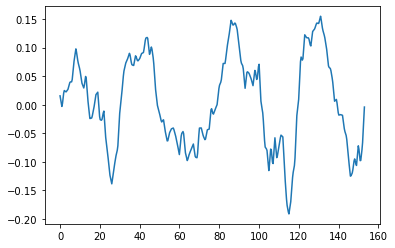

In [30]:
max_cols = 5
max_rows = len(fpca_disc.components_) // max_cols
#fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,max_rows*3.5))
for i in range(len(fpca_disc.components_)):
    row = i // max_cols
    col = i % max_cols
    #axes[row, col].axis("off")
    fpca_disc.components_[i].plot()


In [31]:
foo = fpca_disc.transform(dat_disc)

In [32]:
[x for x in dir(fpca_disc) if 'transform' in x]

['_transform_basis', '_transform_grid', 'fit_transform', 'transform']

In [33]:
type(foo)

numpy.ndarray

In [34]:
foo.shape

(68, 10)

In [35]:
foo.shape

(68, 10)

In [36]:
for minc in range(2,8):
    for ncomp in range(5,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   5 FPCAcomponents:   7 clusters;   54 clustered;   14 unclustered;  validity = None
hdbscan_min_clus= 2 :   6 FPCAcomponents:   7 clusters;   55 clustered;   13 unclustered;  validity = None
hdbscan_min_clus= 2 :   7 FPCAcomponents:   4 clusters;   60 clustered;   8 unclustered;  validity = 0.307
hdbscan_min_clus= 2 :   8 FPCAcomponents:   3 clusters;   65 clustered;   3 unclustered;  validity = 0.256
hdbscan_min_clus= 2 :   9 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = None
hdbscan_min_clus= 2 :   10 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.13
--------------------------
hdbscan_min_clus= 3 :   5 FPCAcomponents:   3 clusters;   56 clustered;   12 unclustered;  validity = 0.188
hdbscan_min_clus= 3 :   6 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.145
hdbscan_min_clus= 3 :   7 FPCAcomponents:   2 clusters;   62 clustered;   6 unclustered;  validity = 0.091
hdbscan_m

In [37]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   4 clusters;   48 clustered;   20 unclustered;  validity = 0.329
hdbscan_min_clus= 2 :   4 FPCAcomponents:   3 clusters;   54 clustered;   14 unclustered;  validity = 0.413
hdbscan_min_clus= 2 :   5 FPCAcomponents:   3 clusters;   56 clustered;   12 unclustered;  validity = 0.188
hdbscan_min_clus= 2 :   6 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.145
hdbscan_min_clus= 2 :   7 FPCAcomponents:   2 clusters;   62 clustered;   6 unclustered;  validity = 0.091
hdbscan_min_clus= 2 :   8 FPCAcomponents:   2 clusters;   64 clustered;   4 unclustered;  validity = 0.148
hdbscan_min_clus= 2 :   9 FPCAcomponents:   2 clusters;   63 clustered;   5 unclustered;  validity = 0.299
hdbscan_min_clus= 2 :   10 FPCAcomponents:   2 clusters;   63 clustered;   5 unclustered;  validity = 0.305
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   4 clusters;   48 clustered;   20 unclustered;  validity = 0.329
hdbs

In [38]:
labels

array([ 0,  0,  1,  0,  0,  0,  1,  0, -1,  1,  0,  0,  0,  1,  0, -1,  1,
        1,  0, -1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  0, -1,  1,  0,  1,  1,  1, -1,  1,  0,  1,  1,  1])

### integrated into ClusterFit

In [39]:
foo = ClusterFit(clusdata_all['deaths'])

In [40]:
foo.hdbscan_fpca()

hdbscan_min_clus= 4 :   5 FPCAcomponents:   3 clusters;   39 clustered;   29 unclustered;  validity = 0.302


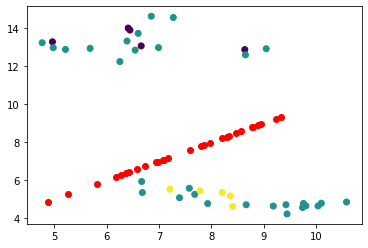

In [41]:
foo.umap()
foo.plot_umap()

### Cases

In [42]:
foocases = ClusterFit(clusdata_all['cases'])
dat = foocases.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [43]:
min_samples = 4
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   5 clusters;   46 clustered;   22 unclustered;  validity = 0.284
hdbscan_min_clus= 2 :   4 FPCAcomponents:   5 clusters;   37 clustered;   31 unclustered;  validity = 0.226
hdbscan_min_clus= 2 :   5 FPCAcomponents:   5 clusters;   36 clustered;   32 unclustered;  validity = 0.222
hdbscan_min_clus= 2 :   6 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.285
hdbscan_min_clus= 2 :   7 FPCAcomponents:   4 clusters;   52 clustered;   16 unclustered;  validity = None
hdbscan_min_clus= 2 :   8 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.263
hdbscan_min_clus= 2 :   9 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.295
hdbscan_min_clus= 2 :   10 FPCAcomponents:   4 clusters;   51 clustered;   17 unclustered;  validity = None
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   5 clusters;   46 clustered;   22 unclustered;  validity = 0.284
hd

### Cases adj_nonlin

In [44]:
foocases_nonlin = ClusterFit(clusdata_all['cases_nonlin'])
dat = foocases_nonlin.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [45]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,16):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   7 clusters;   48 clustered;   20 unclustered;  validity = None
hdbscan_min_clus= 2 :   4 FPCAcomponents:   6 clusters;   46 clustered;   22 unclustered;  validity = None
hdbscan_min_clus= 2 :   5 FPCAcomponents:   8 clusters;   43 clustered;   25 unclustered;  validity = None
hdbscan_min_clus= 2 :   6 FPCAcomponents:   8 clusters;   46 clustered;   22 unclustered;  validity = None
hdbscan_min_clus= 2 :   7 FPCAcomponents:   8 clusters;   43 clustered;   25 unclustered;  validity = None
hdbscan_min_clus= 2 :   8 FPCAcomponents:   7 clusters;   42 clustered;   26 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   7 clusters;   41 clustered;   27 unclustered;  validity = None
hdbscan_min_clus= 2 :   10 FPCAcomponents:   7 clusters;   40 clustered;   28 unclustered;  validity = 0.25981
hdbscan_min_clus= 2 :   11 FPCAcomponents:   7 clusters;   40 clustered;   28 unclustered;  validity = 0.23967
hdbscan_min_clus= 2 :   12 FP

### Scan of optimal clusterings for 6 datasets and 4 clustering quality criteria

The validity calculated by hdbscan does seem to bias lower dimensional embeddings. We study this in a separate notebook "Calibration_of_Validity". Here we consider 4 scorings: the validity, the dimensionality scaled validity, and two combined scorings which also penalizes the number of unclustered points as well as how far the number of clusters departs from 4.

** move Ncomponents to outside loop**

In [46]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)

for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.

    for ncomp in range(2,16):
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])

            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)

                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)

                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.37936 validitysc = 0.37936 score1: 5.236 score2: 6.854
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.38716 validitysc = 0.38716 score1: 6.283 score2: 10.332
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.38716 validitysc = 0.38716 score1: 6.283 score2: 10.332
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.38716 validitysc = 0.38716 score1: 6.283 score2: 10.332
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.38716 validitysc = 0.38716 score1: 6.283 score2: 10.332
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity 

hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   67 clustered;   1 unclustered;  validity = 0.00987 validitysc = 0.02434 score1: 42.279 score2: 12.324
hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   67 clustered;   1 unclustered;  validity = 0.00987 validitysc = 0.02434 score1: 42.279 score2: 12.324
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   67 clustered;   1 unclustered;  validity = 0.00987 validitysc = 0.02434 score1: 42.279 score2: 12.324
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.13104 validitysc = 0.27411 score1: 5.548 score2: 6.384
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.13104 validitysc = 0.27411 score1: 5.548 score2: 6.384
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.13104 validitysc = 0.27411 score1: 5.548 score2: 6.384
hdbscan:  

hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   9 clusters;   56 clustered;   12 unclustered;  validity = 0.53599 validitysc = 0.53599 score1: 6.766 score2: 10.075
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   8 clusters;   53 clustered;   15 unclustered;  validity = 0.51435 validitysc = 0.51435 score1: 6.944 score2: 11.665
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.32062 validitysc = 0.32062 score1: 4.119 score2: 3.119
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.32062 validitysc = 0.32062 score1: 4.119 score2: 3.119
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.32062 validitysc = 0.32062 score1: 4.119 score2: 3.119
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.32062 validitysc = 0.32062 score1: 4.119 score2: 3.119
hdbscan:  9 

hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   7 clusters;   43 clustered;   25 unclustered;  validity = 0.23825 validitysc = 0.43921 score1: 8.777 score2: 19.922
hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.25037 validitysc = 0.45544 score1: 4.196 score2: 4.391
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.11616 validitysc = 0.24761 score1: 6.439 score2: 8.481
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.11616 validitysc = 0.24761 score1: 6.439 score2: 8.481
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.11616 validitysc = 0.24761 score1: 6.439 score2: 8.481
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.11616 validitysc = 0.24761 score1: 6.439 score2: 8.481
hdbscan:  9 m

hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   57 clustered;   11 unclustered;  validity = 0.17252 validitysc = 0.17252 score1: 8.497 score2: 15.941
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.09248 validitysc = 0.09248 score1: 12.813 score2: 21.625
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.09248 validitysc = 0.09248 score1: 12.813 score2: 21.625
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.09879 validitysc = 0.09879 score1: 12.622 score2: 25.305
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.09879 validitysc = 0.09879 score1: 12.622 score2: 25.305
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   53 clustered;   15 unclustered;  validity = 0.39862 validitysc = 0.4823 sco

hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.2563 validitysc = 0.46322 score1: 4.659 score2: 5.397
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.27825 validitysc = 0.5015 score1: 7.194 score2: 12.562
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.27982 validitysc = 0.50345 score1: 7.286 score2: 11.918
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   50 clustered;   18 unclustered;  validity = 0.27367 validitysc = 0.49576 score1: 5.617 score2: 7.262
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   50 clustered;   18 unclustered;  validity = 0.27367 validitysc = 0.49576 score1: 5.617 score2: 7.262
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   50 clustered;   18 unclustered;  validity = 0.27367 validitysc = 0.49576 score1

hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   8 clusters;   54 clustered;   14 unclustered;  validity = 0.31965 validitysc = 0.31965 score1: 7.928 score2: 17.519
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   64 clustered;   4 unclustered;  validity = 0.23762 validitysc = 0.23762 score1: 5.008 score2: 3.367
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   64 clustered;   4 unclustered;  validity = 0.23762 validitysc = 0.23762 score1: 5.008 score2: 3.367
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   65 clustered;   3 unclustered;  validity = 0.001 validitysc = 0.001 score1: 1001.1 score2: 750.0
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.02306 validitysc = 0.02306 score1: 44.766 score2: 26.02
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   55 clustered;   13 unclustered;  validity = 0.4421 validitysc = 0.5269 score1: 6.998 scor

hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.08406 validitysc = 0.18688 score1: 8.951 score2: 20.869
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.08406 validitysc = 0.18688 score1: 8.951 score2: 20.869
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.08406 validitysc = 0.18688 score1: 8.951 score2: 20.869
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   41 clustered;   27 unclustered;  validity = 0.32424 validitysc = 0.55596 score1: 7.699 score2: 12.141
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   41 clustered;   27 unclustered;  validity = 0.32424 validitysc = 0.55596 score1: 7.699 score2: 12.141
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   45 clustered;   23 unclustered;  validity = 0.34916 validitysc = 0.58332 sco

hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   10 clusters;   61 clustered;   7 unclustered;  validity = 0.4971 validitysc = 0.4971 score1: 6.412 score2: 7.041
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   7 clusters;   58 clustered;   10 unclustered;  validity = 0.47577 validitysc = 0.47577 score1: 5.602 score2: 7.357
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  9 minc:   

hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   8 clusters;   44 clustered;   24 unclustered;  validity = 0.26892 validitysc = 0.48976 score1: 8.

hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   58 clustered;   10 unclustered;  validity = 0.39873 validitysc = 0.48241 score1: 6.573 score2: 9.328
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   58 clustered;   10 unclustered;  validity = 0.41929 validitysc = 0.50367 score1: 4.985 score2: 5.956
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   54 clustered;   14 unclustered;  validity = 0.40944 validitysc = 0.49352 score1: 5.326 score2: 7.092
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   54 clustered;   14 unclustered;  validity = 0.40944 validitysc = 0.49352 score1: 5.326 s

hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   8 clusters;   44 clustered;   24 unclustered;  validity = 0.26892 validitysc = 0.48976 score1: 8.842 score2: 19.601
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   43 clustered;   25 unclustered;  validity = 0.30308 validitysc = 0.53157 score1: 7.881 score2: 14.109
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33537 validitysc = 0.56836 score1: 5.159 score2: 6.334
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33537 validitysc = 0.56836 score1: 5.159 score2: 6.334
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33537 validitysc = 0.56836 score1: 5.159 score2: 6.334
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33537 validitysc = 0.56836 score1: 5.159 score2: 6.334
hd

### stash results in data frame

In [47]:

def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
reportdata = [None]*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)
info =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
infomax =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
cnt=0
for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])
            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+1] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+2] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+3] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)
            info.loc[cnt] = [case,minc,min_samples,ncomp,nclustered,nunclustered,validity,validitysc,score1,score2]
            cnt = cnt+1

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.37936 validitysc = 0.37936 score1: 5.236 score2: 6.854
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.38716 validitysc = 0.38716 score1: 6.283 score2: 10.332
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.38716 validitysc = 0.38716 score1: 6.283 score2: 10.332
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.38716 validitysc = 0.38716 score1: 6.283 score2: 10.332
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.38716 validitysc = 0.38716 score1: 6.283 score2: 10.332
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity 

hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   67 clustered;   1 unclustered;  validity = 0.00987 validitysc = 0.02434 score1: 42.279 score2: 12.324
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   67 clustered;   1 unclustered;  validity = 0.00987 validitysc = 0.02434 score1: 42.279 score2: 12.324
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.13104 validitysc = 0.27411 score1: 5.548 score2: 6.384
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.13104 validitysc = 0.27411 score1: 5.548 score2: 6.384
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.13104 validitysc = 0.27411 score1: 5.548 score2: 6.384
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.13104 validitysc = 0.27411 score1: 5.548 score2: 6.384
------------

hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.32062 validitysc = 0.32062 score1: 4.119 score2: 3.119
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.32062 validitysc = 0.32062 score1: 4.119 score2: 3.119
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.32062 validitysc = 0.32062 score1: 4.119 score2: 3.119
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   63 clustered;   5 unclustered;  validity = 0.32062 validitysc = 0.32062 score1: 4.119 score2: 3.119
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.40949 validitysc = 0.49358 score1: 7.226 score2: 12.764
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.40949 validitysc = 0.49358 score1: 7.226 

hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   58 clustered;   10 unclustered;  validity = 0.25858 validitysc = 0.47645 score1: 4.099 score2: 4.198
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.15767 validitysc = 0.32816 score1: 5.447 score2: 6.399
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.15767 validitysc = 0.32816 score1: 5.447 score2: 6.399
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.15767 validitysc = 0.32816 score1: 5.447 score2: 6.399
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.15767 validitysc = 0.32816 score1: 5.447 score2: 6.399
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.15767 validitysc = 0.32816 score1: 5.447 score2: 6.399
---------

--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   53 clustered;   15 unclustered;  validity = 0.39862 validitysc = 0.4823 score1: 7.573 score2: 13.996
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   8 clusters;   50 clustered;   18 unclustered;  validity = 0.37837 validitysc = 0.46105 score1: 7.769 score2: 15.616
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   49 clustered;   19 unclustered;  validity = 0.28446 validitysc = 0.35845 score1: 7.59 score2: 15.902
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   23 unclustered;  validity = 0.30391 validitysc = 0.38028 score1: 7.23 score2: 12.096
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   23 unclustered;  validity = 0.30391 validitysc = 0.38028 score1: 7.23 score2: 12.096
hdbscan:  8 minc:   2 mins:   3 FPCAcomponents:   3 clusters;   38 clustered;   30 unclustered;  validity = 0.22711 validitysc = 0.29228 score1: 9.

hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.27982 validitysc = 0.50345 score1: 7.286 score2: 11.918
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   50 clustered;   18 unclustered;  validity = 0.27367 validitysc = 0.49576 score1: 5.617 score2: 7.262
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   50 clustered;   18 unclustered;  validity = 0.27367 validitysc = 0.49576 score1: 5.617 score2: 7.262
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   50 clustered;   18 unclustered;  validity = 0.27367 validitysc = 0.49576 score1: 5.617 score2: 7.262
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.21233 validitysc = 0.41295 score1: 4.922 score2: 6.054
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.21233 validitysc = 0.41295 score1: 4.922 score2: 6.054
---

hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   64 clustered;   4 unclustered;  validity = 0.23762 validitysc = 0.23762 score1: 5.008 score2: 3.367
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   65 clustered;   3 unclustered;  validity = 0.001 validitysc = 0.001 score1: 1001.1 score2: 750.0
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.02306 validitysc = 0.02306 score1: 44.766 score2: 26.02
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   55 clustered;   13 unclustered;  validity = 0.4421 validitysc = 0.5269 score1: 6.998 score2: 11.103
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   8 clusters;   52 clustered;   16 unclustered;  validity = 0.41636 validitysc = 0.50066 score1: 7.197 score2: 12.783
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   7 clusters;   48 clustered;   20 unclustered;  validity = 0.37917 validitysc = 0.4619 score1: 7.665 sco

hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.08406 validitysc = 0.18688 score1: 8.951 score2: 20.869
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.08406 validitysc = 0.18688 score1: 8.951 score2: 20.869
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.08406 validitysc = 0.18688 score1: 8.951 score2: 20.869
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   41 clustered;   27 unclustered;  validity = 0.32424 validitysc = 0.55596 score1: 7.699 score2: 12.141
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   41 clustered;   27 unclustered;  validity = 0.32424 validitysc = 0.55596 score1: 7.699 score2: 12.141
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   45 clustered;   23 unclustered;  validity = 0.34916 validitysc = 0.58332 sco

hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   58 clustered;   10 unclustered;  validity = 0.39873 validitysc = 0.48241 score1: 6.573 score2:

hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   8 clusters;   44 clustered;   24 unclustered;  validity = 0.26892 validitysc = 0.48976 score1: 8.842 score2: 19.601
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   43 clustered;   25 unclustered;  validity = 0.30308 validitysc = 0.53157 score1: 

hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = 0.38719 validitysc = 0.38719 score1: 4.483 score2: 4.52
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   58 clustered;   10 unclustered;  validity = 0.39873 validitysc = 0.48241 score1: 6.573 score2: 9.328
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   58 clustered;   10 unclustered;  validity = 0.41929 validitysc = 0.50367 score1: 4.985 score

hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.34012 validitysc = 0.56345 score1: 5.175 score2: 6.389
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   8 clusters;   44 clustered;   24 unclustered;  validity = 0.26892 validitysc = 0.48976 score1: 8.842 score2: 19.601
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   43 clustered;   25 unclustered;  validity = 0.30308 validitysc = 0.53157 score1: 

In [48]:
info.shape

(588, 10)

In [49]:
info

,type,minc,mins,ncomp,clustered,unclustered,validity,validitysc,score1,score2
0,deaths,3,2,2,55,13,0.379365,0.379365,5.235985,6.853561
1,deaths,4,2,2,52,16,0.387160,0.387160,6.282914,10.331657
2,deaths,5,2,2,52,16,0.387160,0.387160,6.282914,10.331657
3,deaths,6,2,2,52,16,0.387160,0.387160,6.282914,10.331657
4,deaths,7,2,2,52,16,0.387160,0.387160,6.282914,10.331657
...,...,...,...,...,...,...,...,...,...,...
583,cases_nonlinr,5,2,15,50,18,0.356509,0.607335,5.746538,7.409420
584,cases_nonlinr,6,2,15,50,18,0.356509,0.607335,5.746538,7.409420
585,cases_nonlinr,7,2,15,56,12,0.309619,0.555957,5.198700,6.475319
586,cases_nonlinr,8,2,15,56,12,0.309619,0.555957,5.198700,6.475319


In [50]:
set(info['ncomp'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [51]:
set(info['type'])

{'cases',
 'cases_lin2020',
 'cases_nonlin',
 'cases_nonlinr',
 'cases_pwlfit',
 'deaths'}

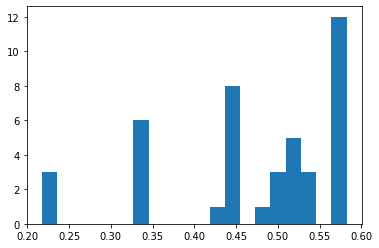

In [52]:
foo = info[info['ncomp']==11]['validitysc']
plt.hist(foo,bins=20);

In [53]:
datlen = len(set(info['ncomp']))

datlen

14

In [54]:
'ncomp = {}'.format(5)

'ncomp = 5'

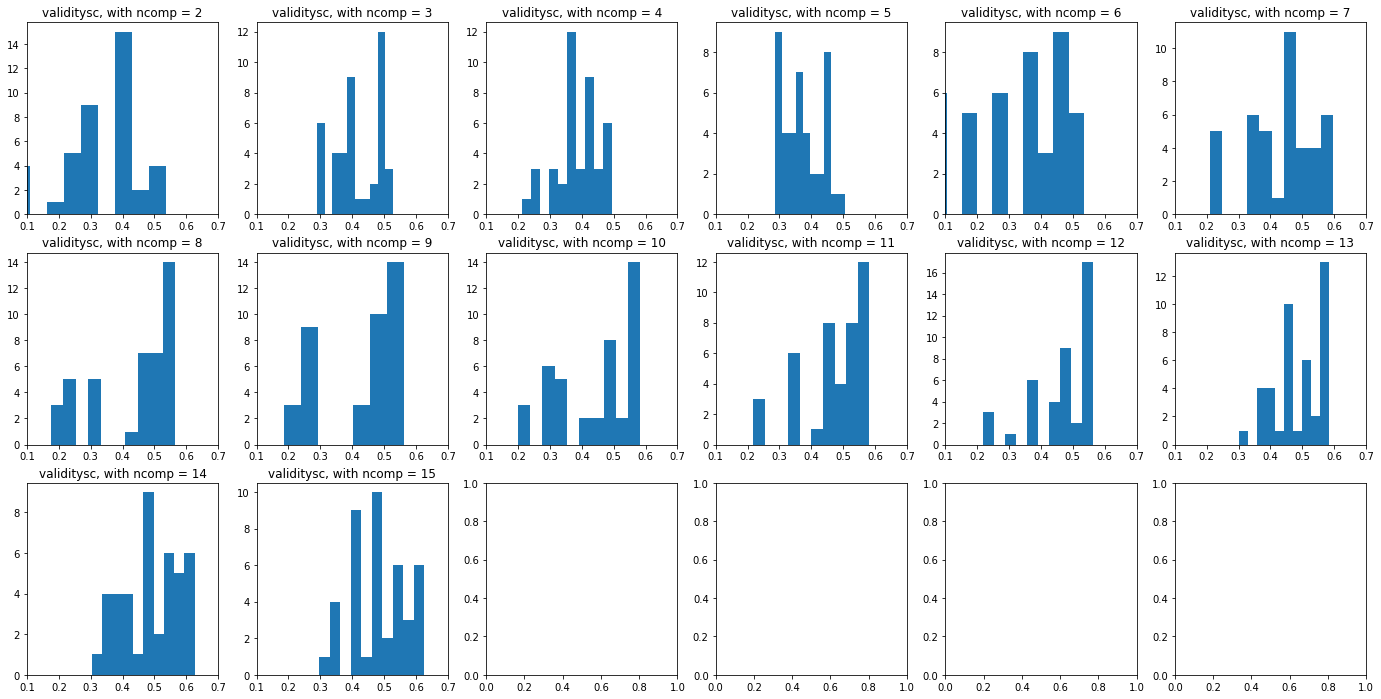

In [55]:
max_cols = 6
vals = set(info['ncomp'])
max_rows = len(vals) // max_cols +1
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

for idx, val  in enumerate(vals):
    row = idx // max_cols
    col = idx % max_cols
    axes[row,col].hist(info[info['ncomp']==val]['validitysc'])
    axes[row,col].set_title('validitysc, with ncomp = {}'.format(val))
    axes[row,col].set_xlim((.1,.7))

In [56]:
info['validitysc']

0      0.379365
1      0.387160
2      0.387160
3      0.387160
4      0.387160
         ...   
583    0.607335
584    0.607335
585    0.555957
586    0.555957
587    0.555957
Name: validitysc, Length: 588, dtype: float64

### Clustering consensus between 6 data sets and 4 optimal clusterings per set

The alignment between clusterings is complex in general. See section 7 for a more sophisticated, but NYI approach for our data. Here we analyse and compare clusterings using colour index matching. 

In [57]:
refclustering = 1
clus_argsort = np.lexsort((countries,clusdata[refclustering]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata.copy()
clusdata_s = clusdata.copy()
for i in range(len(probdata)):
    foo = probdata[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata[i,clus_argsort[j]]   

In [58]:
np.shape(clusdata)
clusdata

array([[-1, -1, -1, ...,  0,  0, -1],
       [ 1,  2,  0, ...,  0,  0,  0],
       [ 2,  2,  2, ...,  3,  3,  1],
       ...,
       [-1,  3,  3, ..., -1,  1, -1],
       [-1,  3,  3, ..., -1,  1,  4],
       [-1,  3,  3, ..., -1,  1,  4]])

In [59]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
ncols = len(set(clusdata.flatten()))
if ncols>11:
    print('currently only 11 colours allowed', ncols )
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5],[0.3,0.7,0.5]]) # black,red,green,blue,yellow,cyan,magenta
colors = np.concatenate((colors,colors))
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

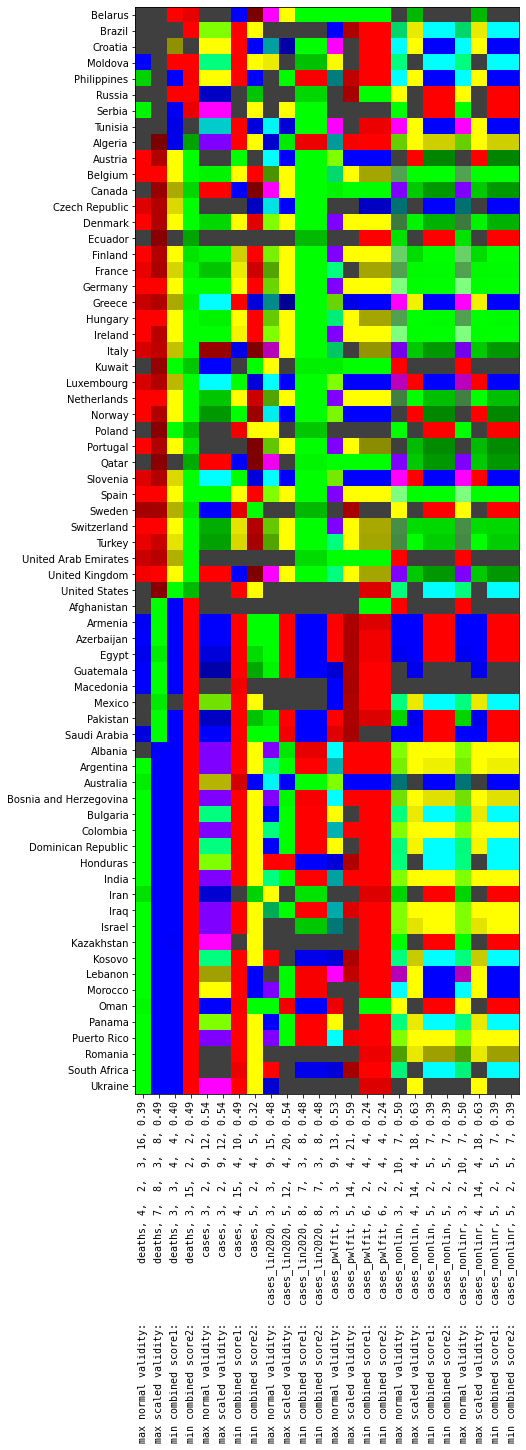

In [60]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')
# fig.colorbar(img)
plt.show()

This cluster comparison suffers from the independent ordering of clusters, which makes the colourings different in each column. In general, given the differnet number of clusters this is a nontrivial problem in graph matching. We adopt a two phase approach in what follows: 
* first choose a reference column (here column 1, not zero) with a good differentiated clustering. 
* relabel the clusters in each other column with the colours of the best matching cluster in the reference column
* then relabel the colours again in case of split clusters, with the hybrid colour of the source cluster colour in reference column and the destination colour

In [61]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def clust(clustering_a,clustering_b,colors_a,colors_b,relabel=True,merge=True): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = list(set(clustering_a))
    labels_b = list(set(clustering_b))
    newcolors_b = np.zeros((len(colors_b),3),dtype=float)
    newcolors_b[:,:] = colors_b[:,:]
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {}
    b_cols = {}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:(maxlab,maxscore)})
    maxvals_a_to_b = [a_to_b[a][1] for a in labels_a]
    reorder_a = np.flip(np.argsort(maxvals_a_to_b))
    labels_a_sort = [labels_a[r] for r in list(reorder_a)]

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:(maxlab,maxscore)})
    maxvals_b_to_a = [b_to_a[b][1] for b in labels_b]
    reorder_b = np.flip(np.argsort(maxvals_b_to_a))
    labels_b_sort = [labels_b[r] for r in list(reorder_b)]    

    if relabel:    
        for b in labels_b_sort:   # first adjust colors_b to match mapped clusters from a (transfer and merge)
            amap = [a for a in labels_a_sort if a_to_b[a][0] == b]
            for a in amap:
                alist = matchset(clustering_a,a)
                a_cols[a] = colors_a[alist[0]]
            blist = matchset(clustering_b,b)
            if len(amap) > 0:
                h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
                for j in blist:
                    s = mpcolors.rgb_to_hsv(colors_b[j])[1] # take s saturation from b
                    v = mpcolors.rgb_to_hsv(colors_b[j])[2] # take v from b
                    newcolors_b[j,:] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb  
            b_cols[b] = newcolors_b[blist[0]] # first matching elt colour (to extract hue)
            
    if merge:
        for a in labels_a_sort:   # now readjust colors in b that both map to same a (split)
            bmap = [b for b in labels_b_sort if b_to_a[b][0] == a]
            if len(bmap)>1:                          
                for i,b in enumerate(bmap):
                    blist = matchset(clustering_b,b)
                    h = (mpcolors.rgb_to_hsv(b_cols[b])[0] + mpcolors.rgb_to_hsv(a_cols[a])[0])/2
                    for j in blist:                     
                        s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                        v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                        newcolors_b[j,:]= mpcolors.hsv_to_rgb([h,s,v])

    return newcolors_b

In [62]:
coldata_c = coldata.copy()
coldata_t = np.transpose(coldata_c,(1,0,2))

print(np.shape(clusdata_s))
print(np.shape(coldata))
print(np.shape(coldata_t))

clusa = clusdata_s[refclustering]
ca = coldata_t[refclustering]
for i in range(0,len(clusdata_s)):
    if i != refclustering:
        clusb = clusdata_s[i]
        cb = coldata_t[i]
        newcolors_b = clust(clusa,clusb,ca,cb,True,False)
        coldata_t[i,:] = newcolors_b[:]
coldata_adj = np.transpose(coldata_t,(1,0,2))

coldata_c2 = coldata.copy()
coldata_t2 = np.transpose(coldata_c2,(1,0,2))

clusa = clusdata_s[refclustering]
ca = coldata_t2[refclustering]
for i in range(0,len(clusdata_s)):
    if i != refclustering:
        clusb = clusdata_s[i]
        cb = coldata_t2[i]
        newcolors_b = clust(clusa,clusb,ca,cb,True,True)
        coldata_t2[i,:] = newcolors_b[:]
coldata_adj2 = np.transpose(coldata_t2,(1,0,2))

(24, 68)
(68, 24, 3)
(24, 68, 3)


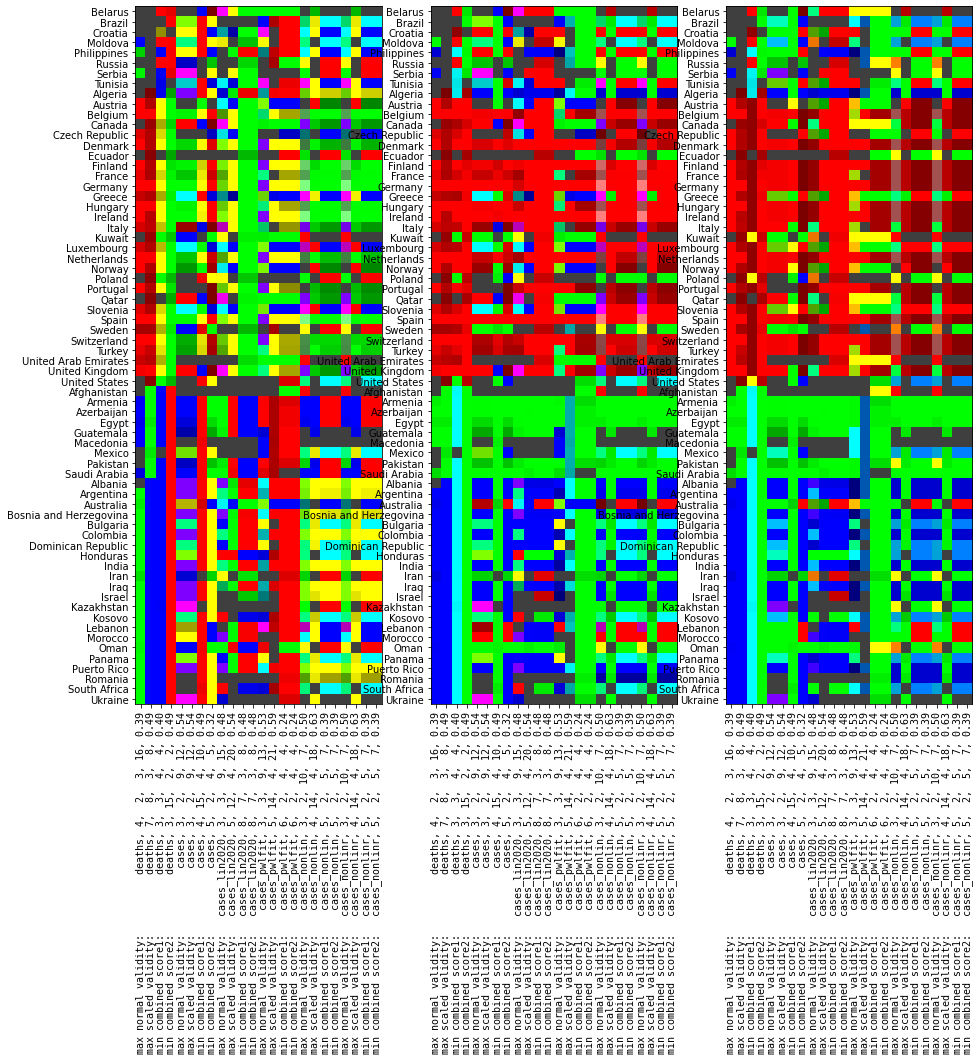

In [63]:
# the three stages of cluster alignment
fig,axes = plt.subplots(1,3,figsize=(15,20))

ax = axes[0]
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[1]
img = ax.imshow(coldata_adj)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[2]
img = ax.imshow(coldata_adj2)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

plt.show()

So the conclusions are: 
* the relabelling phases 1 and 2 are now working
* chosing the right reference column helps : here 1 not 0
* there is pretty good cohesion in the 4 cluster interpretation witht the blue cluster confused by a lot of countries on the blue-green divide

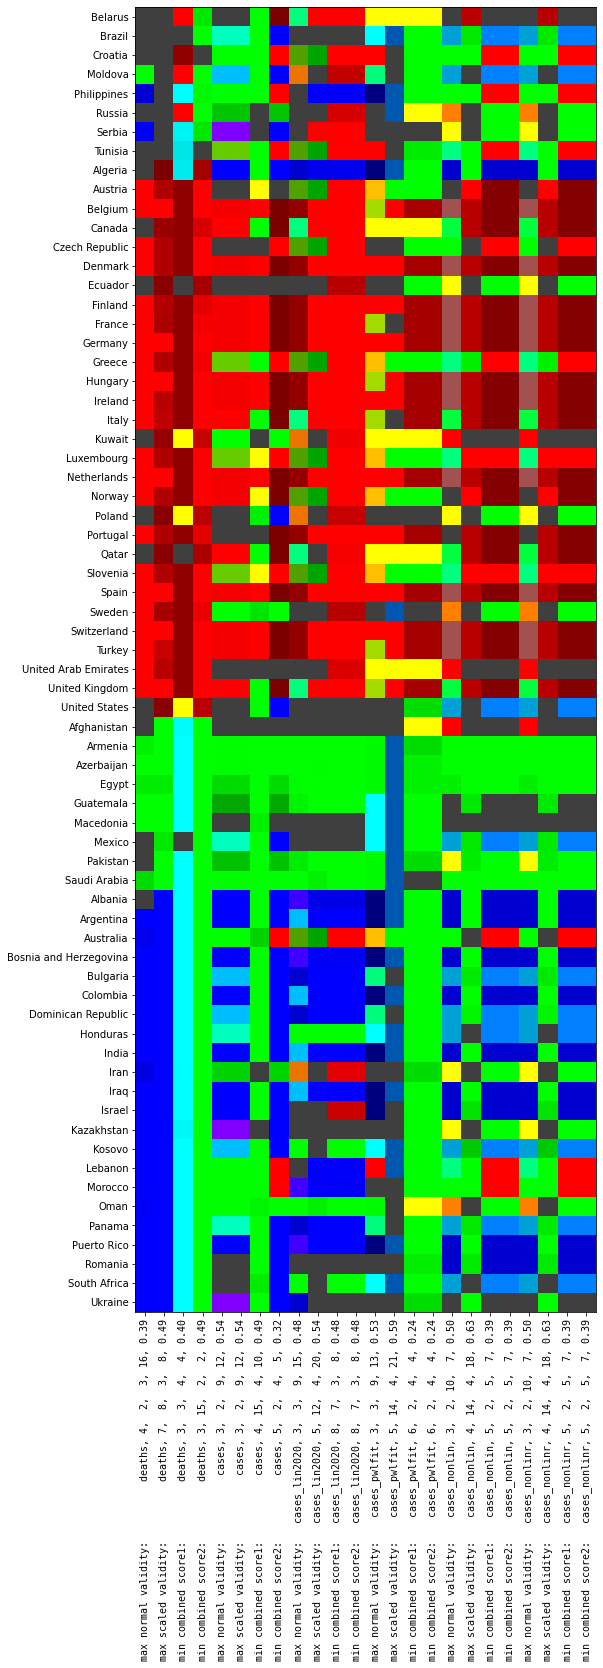

In [64]:
# the final cluster alignment
fig,ax = plt.subplots(1,1,figsize=(10,24))

img = ax.imshow(coldata_adj2)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

plt.show()

### Conclusions

In [65]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report]

score		case	minc	dim	nclus	unclus	validitysc


['max normal validity:          deaths, 4,  2,  3, 16, 0.39',
 'max scaled validity:          deaths, 7,  8,  3,  8, 0.49',
 'min combined score1:          deaths, 3,  3,  4,  4, 0.40',
 'min combined score2:          deaths, 3, 15,  2,  2, 0.49',
 'max normal validity:           cases, 3,  2,  9, 12, 0.54',
 'max scaled validity:           cases, 3,  2,  9, 12, 0.54',
 'min combined score1:           cases, 4, 15,  4, 10, 0.49',
 'min combined score2:           cases, 5,  2,  4,  5, 0.32',
 'max normal validity:   cases_lin2020, 3,  3,  9, 15, 0.48',
 'max scaled validity:   cases_lin2020, 5, 12,  4, 20, 0.54',
 'min combined score1:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score2:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'max normal validity:    cases_pwlfit, 3,  3,  9, 13, 0.53',
 'max scaled validity:    cases_pwlfit, 5, 14,  4, 21, 0.59',
 'min combined score1:    cases_pwlfit, 6,  2,  4,  4, 0.24',
 'min combined score2:    cases_pwlfit, 6,  2,  4,  4, 0.24',
 'max no

In [66]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'scaled' in x]

score		case	minc	dim	nclus	unclus	validitysc


['max scaled validity:          deaths, 7,  8,  3,  8, 0.49',
 'max scaled validity:           cases, 3,  2,  9, 12, 0.54',
 'max scaled validity:   cases_lin2020, 5, 12,  4, 20, 0.54',
 'max scaled validity:    cases_pwlfit, 5, 14,  4, 21, 0.59',
 'max scaled validity:    cases_nonlin, 4, 14,  4, 18, 0.63',
 'max scaled validity:   cases_nonlinr, 4, 14,  4, 18, 0.63']

In [67]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score1' in x]

score		case	minc	dim	nclus	unclus	validitysc


['min combined score1:          deaths, 3,  3,  4,  4, 0.40',
 'min combined score1:           cases, 4, 15,  4, 10, 0.49',
 'min combined score1:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score1:    cases_pwlfit, 6,  2,  4,  4, 0.24',
 'min combined score1:    cases_nonlin, 5,  2,  5,  7, 0.39',
 'min combined score1:   cases_nonlinr, 5,  2,  5,  7, 0.39']

In [68]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score2' in x]

score		case	minc	dim	nclus	unclus	validitysc


['min combined score2:          deaths, 3, 15,  2,  2, 0.49',
 'min combined score2:           cases, 5,  2,  4,  5, 0.32',
 'min combined score2:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score2:    cases_pwlfit, 6,  2,  4,  4, 0.24',
 'min combined score2:    cases_nonlin, 5,  2,  5,  7, 0.39',
 'min combined score2:   cases_nonlinr, 5,  2,  5,  7, 0.39']

In [69]:
[(x,info[x]['dim'],info[x]['uclustered'] for x in cases]

SyntaxError: invalid syntax (<ipython-input-69-dadd8941ad60>, line 1)

In [93]:
# rerun for optimal parameters
# minscore1 : could use maxvalid or minscore1 instead
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2 = minscore1[0]

food = ClusterFit(clusdata_all['cases_nonlin'])
dat = food.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

fpca_disc = FPCA(n_components=ncomp)
fpca_disc.fit(dat_disc)
foo = fpca_disc.transform(dat_disc)
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
labels = clusterer.fit_predict(foo)
try:
    validity = hdbscan.validity.validity_index(foo, labels)
    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
          len(set([x for x in labels if x>-1])),'clusters;  ',
          sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
except:
    validity=None


    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
      len(set([x for x in labels if x>-1])),'clusters;  ',
      sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
#print(labels)

hdbscan_min_clus= 4 :   14 FPCAcomponents:   4 clusters;   51 clustered;   17 unclustered;  validity = 0.38309


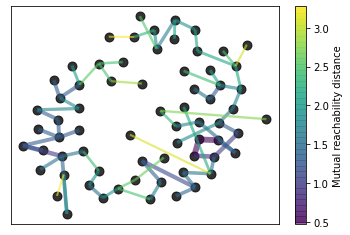

In [94]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

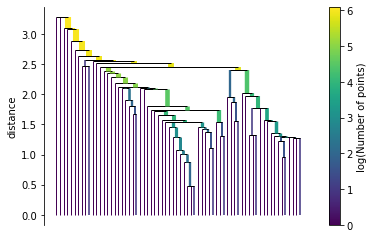

In [95]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

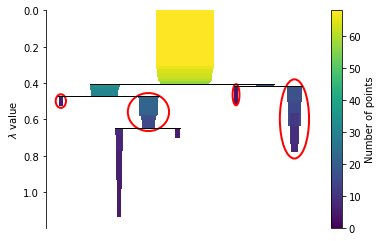

In [96]:
#clusterer.condensed_tree_.plot()
clusterer.condensed_tree_.plot(select_clusters=True)

In [97]:
from sklearn import datasets
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

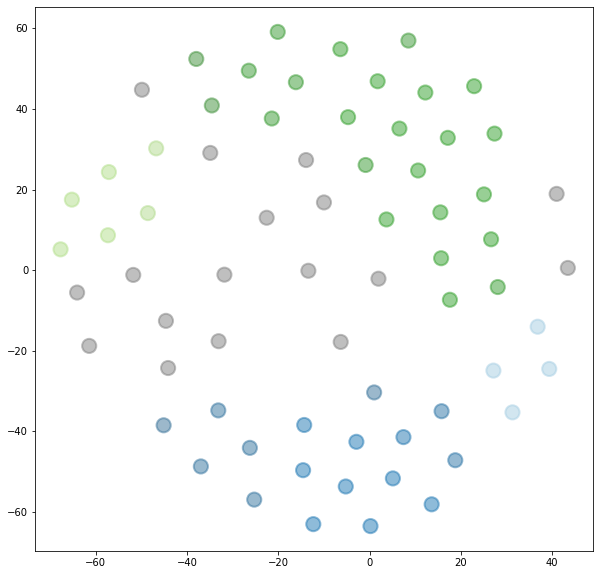

In [98]:
projection = TSNE().fit_transform(dat)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
else (0.5, 0.5, 0.5)
for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(*projection.T, s=200, linewidth=2, c=cluster_member_colors, alpha=0.5)

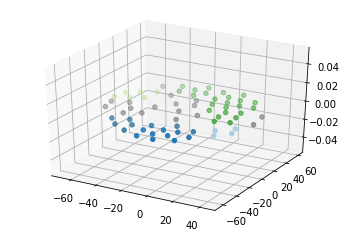

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*projection.T,c=cluster_member_colors)

In [100]:
len(countries)

68

In [101]:
len(probdata[0])

68

## 2nd method using basis:

basis = skfda.representation.basis.BSpline(n_basis=20)
basis_dat_disc = dat_disc.to_basis(basis)
basis_dat_disc.plot()

# Clustering comparisons

Matrix density plot :
Columns : different clusterings.
Rows: the countries.

1.	Choose candidate best clustering: this determines labels of clusters
2.	Order countries by this clustering then alphabetically within cluster
3.	For this first clustering complete column with prob of country assignment being correct. Assign one of 3-6 colours to each cluster label. Shade colour intensity with prob. e.g. colours (red, green ,blue, yellow, magenta, cyan)
4.	For next clustering: firstly determine best matches of cluster index to first clustering. If more clusters than best (or for later steps those already registered), add new clusters to cluster list with new colours. Stop at 6 clusters in registered list. Members of further clusters all receive colour black with grey tone.


## PCA clusterings

In [105]:
# redo all clustering compactly 
# Norman I guess you need to substitute this with dbhscan
datasets = [c for c in clusdata_all]
print(datasets)
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    # mfit = ClusterFit(clusdata_all[d],fft='fft') # only 2 clusters for 'deaths'
    mfit.umap_best_cluster(Nclus=3)
    res[d] = mfit

['deaths', 'cases', 'cases_lin2020', 'cases_pwlfit', 'cases_nonlin', 'cases_nonlinr']
doing  deaths ...
found 30 clusterings with size 3 clusters
doing  cases ...
found 16 clusterings with size 3 clusters
doing  cases_lin2020 ...
found 0 clusterings with size 3 clusters
Failed to find a cluster with 3 components
doing  cases_pwlfit ...
found 34 clusterings with size 3 clusters
doing  cases_nonlin ...
found 1 clusterings with size 3 clusters
doing  cases_nonlinr ...
found 1 clusterings with size 3 clusters


In [106]:
clus_argsort = np.lexsort((countries,res['deaths'].clus_labels))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata2 = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2 = np.zeros((len(res),len(countries)),dtype=np.integer)
probdata2s = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2s = np.zeros((len(res),len(countries)),dtype=np.integer)
for i,rr in enumerate(res):
    foo = res[rr]
    probdata2[i,:] = foo.clus_probs[:]
    clusdata2[i,:] = foo.clus_labels[:]
    for j in range(len(scountries)):
        probdata2s[i,j] = foo.clus_probs[clus_argsort[j]]
        clusdata2s[i,j] = foo.clus_labels[clus_argsort[j]] 

In [107]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata2s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata2s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[1+cindex[:,:]],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose(cluscols*rawdata,(1,2,0))   # transpose back to have colours as elements of 2D array
report2 = ['umap_pca: %16s' % r for r in res]

In [108]:
report2

['umap_pca:           deaths',
 'umap_pca:            cases',
 'umap_pca:    cases_lin2020',
 'umap_pca:     cases_pwlfit',
 'umap_pca:     cases_nonlin',
 'umap_pca:    cases_nonlinr']

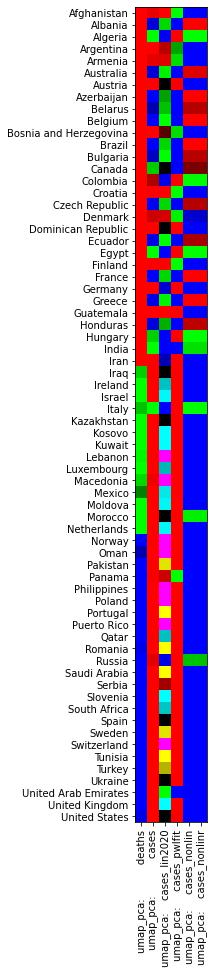

In [109]:
fig,ax = plt.subplots(1,1,figsize=(10,15))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_xticks(range(len(res)))
ax.set_xticklabels(report2,rotation='vertical')
# fig.colorbar(img)
plt.show()

## HDBSCAN and PCA clusterings together

In [184]:
clusdata12 = np.concatenate((clusdata,clusdata2))
probdata12 = np.concatenate((probdata,probdata2))
report12 = report + report2
clus_argsort = np.lexsort((countries,clusdata12[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata12.copy()
clusdata_s = clusdata12.copy()
for i in range(len(probdata12)):
    foo = probdata12[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata12[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata12[i,clus_argsort[j]]   

In [185]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

IndexError: index 7 is out of bounds for axis 0 with size 7

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report12,rotation='vertical')
# fig.colorbar(img)
plt.show()

Mapping between clusters, so that recolor columns to best match 

In [219]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def clust(clustering_a,clustering_b,colors_a,colors_b): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = set(clustering_a)
    labels_b = set(clustering_b)
    
    if len(labels_a) != len(colors_a): print('error wrong color list length for a')
    if len(labels_b) != len(colors_b): print('error wrong color list length for b')
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {a : colors_a[i] for i,a in enumerate(labels_a)}
    b_cols = {b : colors_b[i] for i,b in enumerate(labels_b)}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:maxlab})

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:maxlab})
    
    for b in labels_b:   # first adjust colors in b to match mapped clusters from a (transfer and merge)
        amap = [a for a in labels_a if a_to_b[a] == b]
        if len(amap) > 0:
            h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
            s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
            v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
            b_cols[b] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb

    for a in labels_a:   # now readjust colors in b that both map to same a (split)
        bmap = [b for b in labels_b if b_to_a[b] == a]
        if len(bmap)>1:
            h = sum([mpcolors.rgb_to_hsv(b_cols[b])[0] for b in bmap])/len(bmap) # average hue from bmap  
            ha = mpcolors.rgb_to_hsv(a_cols[a])[0]
            hb = np.linspace(abs(h-ha/4.),abs(h+ha/4.),len(bmap))
            #print('hb[',hb[0],hb[1],']',h,ha,ha/4.,abs(h-ha/4.),abs(h+ha/4.))
            for i,b in enumerate(bmap):
                s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                #print('s',s)
                v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                #print('v',v)
                b_cols[b]= mpcolors.hsv_to_rgb([hb[i],s,v])
                #print('hb[i],b_cols[b]',hb[i],b_cols[b])
    return b_cols,a_to_b,b_to_a

In [220]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,2,2,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1]])

({0: array([0., 1., 0.]), 1: array([1., 0., 0.]), 2: array([0., 0., 1.])},
 {0: 1, 1: 0, 2: 2},
 {0: 1, 1: 0, 2: 2})

In [221]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,3,3,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1],[1,1,0]])

({0: array([0., 1., 0.]),
  1: array([1., 0., 0.]),
  2: array([0., 1., 1.]),
  3: array([1., 0., 1.])},
 {0: 1, 1: 0, 2: 3},
 {0: 1, 1: 0, 2: 2, 3: 2})

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 

def match1(a,x):
    rtn = [1 if a[i] == x else 0 for i in range(len(a)) ]
    return rtn

## Family matching paper

References:
* [the paper](https://hal.inria.fr/hal-01514872/document)
* [the user manual](https://sbl.inria.fr/doc/D_family_matching-user-manual.html)
* [Structural Bioinformatics Library](https://sbl.inria.fr/doc/index.html) C++/python
* [jupyter notebook](https://sbl.inria.fr/demos/D_family_matching.ipynb)
